<a href="https://colab.research.google.com/github/pingao2019/DS-Unit-4-Sprint-1-NLP/blob/master/LS_DS_411_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 





## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [0]:
%pwd

'C:\\Users\\abc\\Desktop\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [0]:

import pandas as pd
shops= pd.read_csv('./data/yelp_coffeeshop_review_data.csv')

#url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

#shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [0]:
shops.shape

(7616, 3)

In [0]:
shops['star_rating'].value_counts(normalize=True)

 5.0 star rating     0.496324
 4.0 star rating     0.309874
 3.0 star rating     0.096901
 2.0 star rating     0.060399
 1.0 star rating     0.036502
Name: star_rating, dtype: float64

In [0]:
shops1 = shops.copy()
shops1['star_rating'] = shops1['star_rating'].astype(str).str[1:4]
shops1['star_rating'] = shops1['star_rating'].astype(float)
shops1.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0


In [0]:
shops1['Rating'] = shops1['star_rating'].apply(lambda x: 'good' if x >= 4 else 'bad')

shops1.head()

,coffee_shop_name,full_review_text,star_rating,Rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,good
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,good
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,bad
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,good


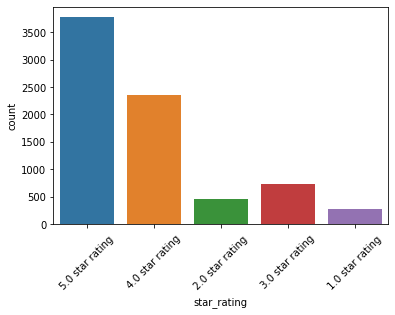

In [0]:
import seaborn as sns
chart=sns.countplot(shops1['star_rating'])
1chart.set_xticklabels(chart.get_xticklabels(), rotation=45);


In [0]:
import spacy
from spacy.tokenizer import Tokenizer

# load the spacy nlprocessor
nlp = spacy.load("en_core_web_lg")

# instantiate the tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [0]:
document = nlp(str(shops1['full_review_text']))
document

0        11/25/2016 1 check-in Love love loved the atm...
1        12/2/2016 Listed in Date Night: Austin, Ambia...
2        11/30/2016 1 check-in Listed in Brunch Spots ...
3        11/25/2016 Very cool decor! Good drinks Nice ...
4        12/3/2016 1 check-in They are located within ...
                              ...                        
7611     2/19/2015 I actually step into this restauran...
7612     1/21/2016 Ok, The Steeping Room IS awesome. H...
7613     4/30/2015 Loved coming here for tea, and the ...
7614     8/2/2015 The food is just average. The booths...
7615     5/23/2015 I finally stopped in for lunch with...
Name: full_review_text, Length: 7616, dtype: object

In [0]:
for token in document:
    print(token.text)

0
       
11/25/2016
1
check
-
in
Love
love
loved
the
atm
...


1
       
12/2/2016
Listed
in
Date
Night
:
Austin
,
Ambia
...


2
       
11/30/2016
1
check
-
in
Listed
in
Brunch
Spots
...


3
       
11/25/2016
Very
cool
decor
!
Good
drinks
Nice
...


4
       
12/3/2016
1
check
-
in
They
are
located
within
...

                              
...
                       

7611
    
2/19/2015
I
actually
step
into
this
restauran
...


7612
    
1/21/2016
Ok
,
The
Steeping
Room
IS
awesome
.
H
...


7613
    
4/30/2015
Loved
coming
here
for
tea
,
and
the
...


7614
    
8/2/2015
The
food
is
just
average
.
The
booths
...


7615
    
5/23/2015
I
finally
stopped
in
for
lunch
with
...


Name
:
full_review_text
,
Length
:
7616
,
dtype
:
object


In [0]:

tokens = []

#  Tokenizer.pipe tokenizes a stream of text
for doc in tokenizer.pipe(shops1['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc] # take the token for each iteration
    tokens.append(doc_tokens) 

shops1['tokens'] = tokens

In [0]:
shops1.head()

,coffee_shop_name,full_review_text,star_rating,Rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,good,"[ , 11/25/2016, 1, check-in, Love, love, loved..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,good,"[ , 12/2/2016, Listed, in, Date, Night:, Austi..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,good,"[ , 11/30/2016, 1, check-in, Listed, in, Brunc..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,bad,"[ , 11/25/2016, Very, cool, decor!, Good, drin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,good,"[ , 12/3/2016, 1, check-in, They, are, located..."


In [0]:
# Function that takes a corpus of document and returns and dataframe of word counts for us to analyze.
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [0]:
word_count = count(shops1['tokens'])
word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,the,6520,27779,1.0,0.034334,0.034334,0.856092
24,and,6804,25748,2.0,0.031824,0.066157,0.893382
66,,7616,22606,3.0,0.027940,0.094097,1.000000
19,a,6181,22085,4.0,0.027296,0.121394,0.811581
51,I,5469,19780,5.0,0.024447,0.145841,0.718093


In [0]:
STOP_WORDS = nlp.Defaults.stop_words.union(["i've",'1', ' ', 'coffee', "it's", 'it.', "i'm", 'check-in' ])

In [0]:
tokens = []

""" Add a doc_tokens list to account for stop words"""
# tokenizer.pipe tokenizes a stream of text, looking at each token
for doc in tokenizer.pipe(shops1['full_review_text'], batch_size=500):
    
    # will be a list of valid tokens
    docs_token = []
    
    # for each token, if not a stop word or punctuation, add it to doc_tokens
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            docs_token.append(token.text.lower())
    
    tokens.append(docs_token)
    
shops1['tokens'] = tokens

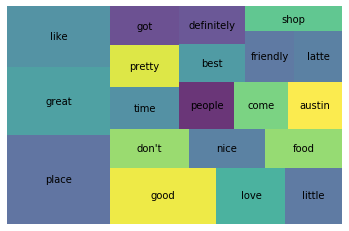

In [0]:
import squarify
import matplotlib.pyplot as plt

word_count = count(shops1['tokens'])
wc_top20 = word_count[word_count['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [0]:
word_count = count(shops1['tokens'])
word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
76,place,3029,4264,1.0,0.011224,0.011224,0.397715
83,great,2438,3250,2.0,0.008555,0.019778,0.320116
188,like,2034,2902,3.0,0.007639,0.027417,0.267069
173,good,2084,2779,4.0,0.007315,0.034732,0.273634
25,love,1434,1806,5.0,0.004754,0.039485,0.188288


In [0]:
# view count by rating
tokens = []

""" Add a doc_tokens list to account for stop words"""
# tokenizer.pipe tokenizes a stream of text, looking at each token
for doc in tokenizer.pipe(good['full_review_text'], batch_size=500):
    
    # will be a list of valid tokens
    docs_token = []
    
    # for each token, if not a stop word or punctuation, add it to doc_tokens
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            docs_token.append(token.text.lower())
    
    tokens.append(docs_token)
    
good['tokens'] = tokens

good_word_count = count(good['tokens'])
good_wc_top20 = good_word_count[good_word_count['rank'] <= 20]

print('good rating')
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()
word_count.head()



NameError: name 'good' is not defined

In [0]:
tokens = []

""" Add a doc_tokens list to account for stop words"""
# tokenizer.pipe tokenizes a stream of text, looking at each token
for doc in tokenizer.pipe(bad['full_review_text'], batch_size=500):
    
    # will be a list of valid tokens
    docs_token = []
    
    # for each token, if not a stop word or punctuation, add it to doc_tokens
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            docs_token.append(token.text.lower())
    
    tokens.append(docs_token)
    
bad['tokens'] = tokens

bad_word_count = count(bad['tokens'])
bad_wc_top20 = bad_word_count[bad_word_count['rank'] <= 20]

print('bad rating tokens')
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

NameError: name 'bad' is not defined

In [0]:
bad_word_count.head()

NameError: name 'bad_word_count' is not defined

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

